## Incremental Clustering: 

In [4]:
from sklearn.datasets import load_iris
import numpy as np

In [5]:
data = load_iris()
X = data.data
y = data.target
np.unique(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [122]:
import random
import math

class DataPoint:
    def __init__(self, a , b , c, d ):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
    
    def get_a(self):
        return self.a
    
    def get_b(self):
        return self.b
    
    def get_c(self):
        return self.c

    def get_d(self):
        return self.d
    
    def set_cluster(self, clusterNumber):
        self.clusterNumber = clusterNumber
    
    def get_cluster(self):
        return self.clusterNumber

In [123]:
class Centroid:
    def __init__(self, a, b , c, d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
    
    def set_a(self, a):
        self.a = a
    
    def get_a(self):
        return self.a

    def set_b(self, b):
        self.b = b
    def get_b(self):
        return self.b

    def set_c(self, c):
        self.c = c
    def get_c(self):
        return self.c

    def set_d(self, d):
        self.d = d
    def get_d(self):
        return self.d


In [124]:
def initialize_centroids():
    for k in range(K):
        c1 = Centroid(random.uniform(4,8) , random.uniform(1.5,4.5) , random.uniform(0.5,7) ,random.uniform(0,3))
        centroids.append(c1)
        clusters.append(0)
    return

In [125]:
def get_distance(datapoint , centroid):
    return math.sqrt(math.pow(datapoint.get_a()-centroid.get_a(),2)+ math.pow(datapoint.get_b()-centroid.get_b(),2)+ math.pow(datapoint.get_c()-centroid.get_c(),2)
                     + math.pow(datapoint.get_d()-centroid.get_d(),2))

def calculate_centroids(X, y):
    (inputs , outputs) = X, y
    for i in range(150):
        d = DataPoint(float(inputs[i][0]) , float(inputs[i][1]) , float(inputs[i][2]) ,float(inputs[i][3]))
        #print("data centoid:             (" , d.get_a() , " , " , d.get_b() , " , " , d.get_c() , " , " , d.get_d() , ")")
        distances = []
        for k in range(K):
            distances.append(get_distance(d , centroids[k]))
        #print('distances : ' , distances)
        min_index = distances.index(min(distances))
        #print("centroid number " , min_index , " is selected")
        centroids[min_index].set_a(
            (d.get_a()+ (clusters[min_index]*centroids[min_index].get_a()))/(clusters[min_index]+1))
        centroids[min_index].set_b(
            (d.get_b()+ (clusters[min_index]*centroids[min_index].get_b()))/(clusters[min_index]+1))
        centroids[min_index].set_c(
            (d.get_c()+ (clusters[min_index]*centroids[min_index].get_c()))/(clusters[min_index]+1))
        centroids[min_index].set_d(
            (d.get_d()+ (clusters[min_index]*centroids[min_index].get_d()))/(clusters[min_index]+1))
        clusters[min_index] += 1
        #print("Updated centoid:             (" , centroids[min_index].get_a() , " , " , centroids[min_index].get_b() , " , " , centroids[min_index].get_c() , " , " , centroids[min_index].get_d() , ")")
        #print("point number " , i+1 , 'belongs to class ' , min_index+1)
    return

In [126]:
def show_centroids():
    print("updated centroids : ")
    for c1 in centroids:
        print("(" , c1.get_a() , " , " , c1.get_b() , " , " , c1.get_c() , " , " , c1.get_d() , ")")

def show_results():
    miss_classified_data = 0
    for number in clusters:
        print(number, " data points belong to cluster number ", clusters.index(number)+1)
        if(number - 50 > 0):
            miss_classified_data += number - 50
    print('Accuracy : ' , 100-((miss_classified_data/150.0)*100) , '%')

def calculate_entropy():
    global clusters
    entropy =0
    for number in clusters:
        if number != 0:
            entropy += (number/150.0)*math.log(number/150.0)
    print("Entropy: ",entropy)

In [127]:
def ikmean(X, y):
    initialize_centroids()
    calculate_centroids(X, y)
    #show_centroids()
    show_results()
    calculate_entropy()

In [136]:
K = len(np.unique(y))
TOTAL_NUMBER_OF_DATA = len(X)
centroids = []

clusters = []

ikmean(X, y)

37  data points belong to cluster number  1
50  data points belong to cluster number  2
63  data points belong to cluster number  3
Accuracy :  91.33333333333333 %
Entropy:  -1.0758179554168548


### INTRUSION DETECTION 

In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import os
import sys
import cv2

In [3]:
def initBackground(initImage):
    img_arr = mpimg.imread(initImage)
    mean = img_arr
    variance = 9*np.ones(img_arr.shape)
    return(mean,variance)

In [4]:
def ForegroundDetection(img_file,mean,variance,lmda):
    img = cv2.imread(img_file) 
    d = img - mean
    y = variance*(lmda**2)
    d_2 = np.square(d)
    I = d_2 - y
    mask = np.all(I>0,axis=2)
    rI = 255*mask.astype(int)
    rI = rI.astype(np.uint8)
    return(rI)

In [5]:
def initialize(data):
    mean = data
    variance = 9*np.ones(data.shape)
    return(mean,variance)

In [9]:
def Voting(rI,eta,m,n):
    r,c = rI.shape
    cI = np.zeros((rI.shape[0],rI.shape[1]))
    for i in range(m,r-1-m):
        for j in range(n,c-1-n):
            img_patch = rI[i-m:i,j-n:j]
            y_unq, counts = np.unique(img_patch,return_counts=True)
            if len(counts) == 1 and y_unq[0] == 1:
                cI[i,j] = 255
            if len(counts)>1:
                if counts[1] > eta*m*n:
                    cI[i,j] = 255
    cI = cI.astype(np.uint8)
    return cI

In [14]:
def meanvarUpdate(cI,img_path,M,V,alpha):
    img = mpimg.imread(img_path)
    mean_upd = np.zeros(img.shape)
    var_upd = np.zeros(img.shape)
    d = img - M
    d_2 = np.square(d)
    for i in range(cI.shape[0]):
        for j in range(cI.shape[1]):
            if cI[i,j] == 0:
                mean_upd[i,j,:] = (1-alpha)*M[i,j,:] + alpha*img[i,j,:]
                var_upd[i,j,:] = (1-alpha)*(V[i,j,:] + alpha*d_2[i,j,:])
                var_upd[i,j,:] = np.clip(var_upd[i,j,:],a_min = 9,a_max = None)
    return(mean_upd,var_upd)

In [12]:
def Background_Subtraction(img_dir,lmda,eta,m,n,alpha):
    
    img_file_name = os.listdir(img_dir)
    initImage = os.path.join(img_dir,img_file_name[0])
    mean, variance = initBackground(initImage)
#     print(variance)
    for i in range(1,19):
        img_path = os.path.join(img_dir,img_file_name[i])
        
        fig, ax = plt.subplots(1,3,figsize=(10,10))
        rI = ForegroundDetection(img_path,mean,variance,lmda)
        ax[0].imshow(rI,cmap="gray")
        
        cI = Voting(rI,eta,m,n)
        mean, variance = meanvarUpdate(cI,img_path,mean,variance,alpha)
        ax[1].imshow(cI,cmap="gray")
        
        img = cv2.imread(img_path)
        ax[2].imshow(img,cmap="gray")
        
        plt.show()
    return(mean,variance)

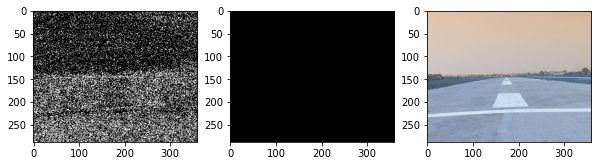

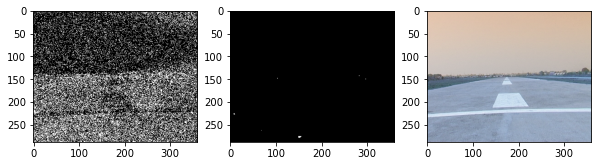

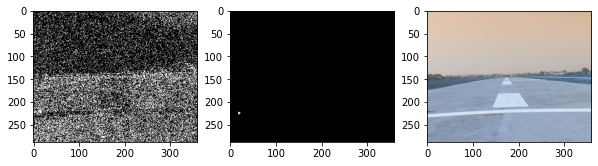

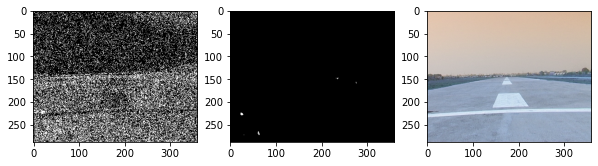

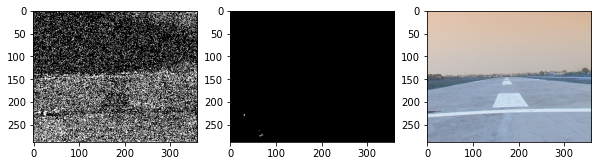

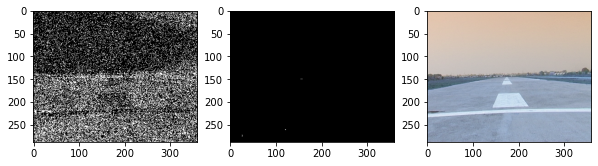

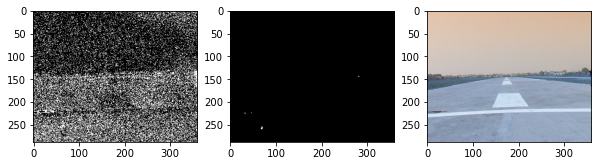

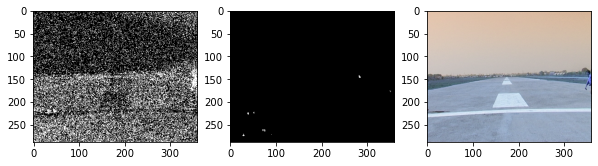

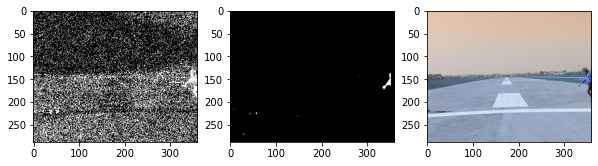

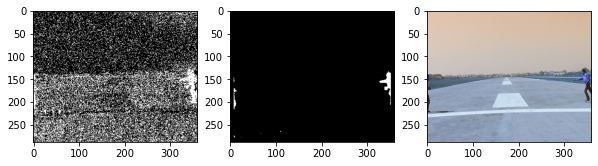

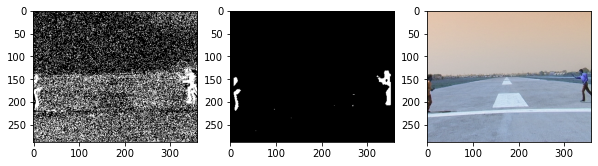

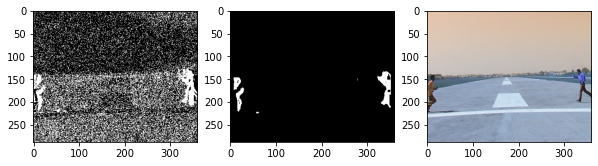

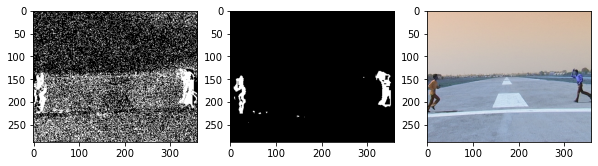

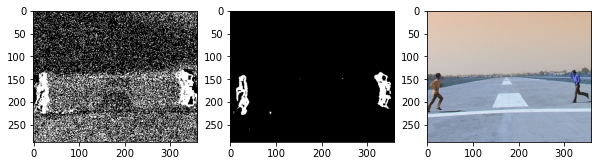

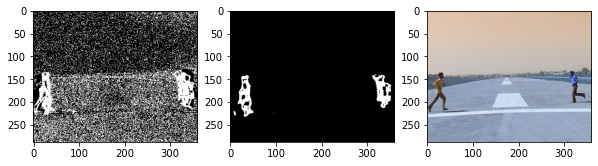

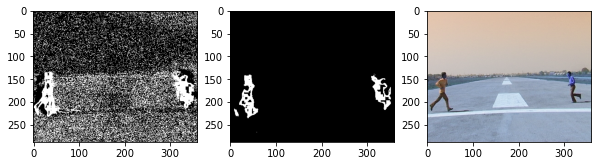

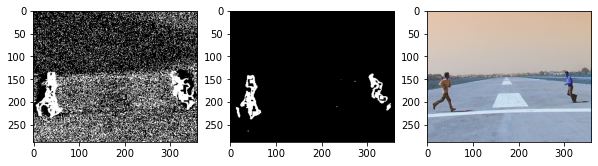

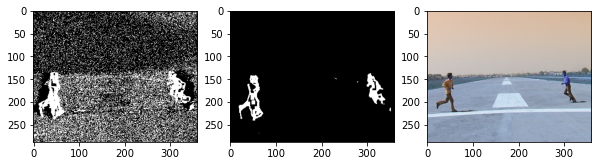

In [15]:
mean,variance = Background_Subtraction("./Images",0.8,0.7,8,8,0.8)